In [41]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [42]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [43]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***Data Exploration***

In [44]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [47]:
df.duplicated().sum()

1081

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.drop(columns=['Time'],inplace=True)

***Scaling***

In [50]:
scaler=StandardScaler()

In [51]:
df['Amount']=scaler.fit_transform(df[['Amount']])

***Balance Data***

In [52]:
x=df.drop(columns=['Class'])
y=df['Class']

In [53]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x,y= rus.fit_resample(x,y)

***Split Data***

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

***Modeling***

In [55]:
def evaluate_model(model,pred):
    print(f'Accuracy Train Score : {model.score(x_train,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test,y_test)}\n')
    print(f'Classification Report: \n{classification_report(y_test,pred)}\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()

In [56]:
lr=LogisticRegression()

In [57]:
lr.fit(x_train,y_train)

LogisticRegression()

In [58]:
y_pred_lr=lr.predict(x_test)

Accuracy Train Score : 0.9470899470899471

Accuracy Test Score : 0.9421052631578948

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        92
           1       0.96      0.93      0.94        98

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190




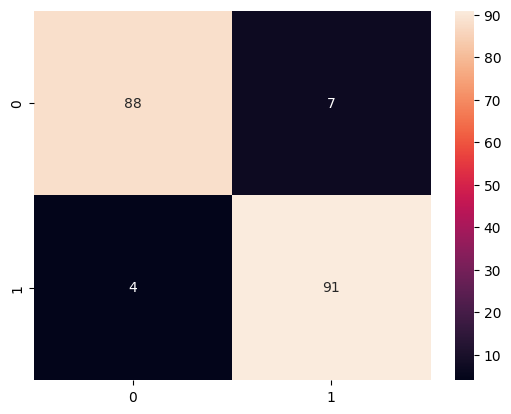

In [59]:
evaluate_model(lr,y_pred_lr)

In [60]:
dt=DecisionTreeClassifier()

In [61]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred_dt=dt.predict(x_test)

Accuracy Train Score : 1.0

Accuracy Test Score : 0.9052631578947369

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        92
           1       0.89      0.93      0.91        98

    accuracy                           0.91       190
   macro avg       0.91      0.90      0.90       190
weighted avg       0.91      0.91      0.91       190




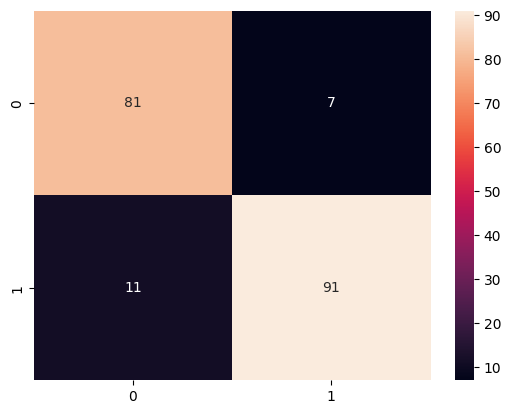

In [63]:
evaluate_model(dt,y_pred_dt)

In [64]:
rf=RandomForestClassifier()

In [65]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred_rf=rf.predict(x_test)

Accuracy Train Score : 1.0

Accuracy Test Score : 0.9368421052631579

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        92
           1       0.96      0.92      0.94        98

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190




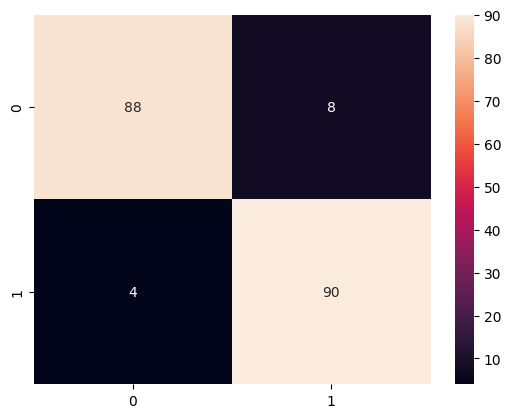

In [67]:
evaluate_model(rf,y_pred_rf)

In [68]:
svm=SVC()

In [69]:
svm.fit(x_train,y_train)

SVC()

In [70]:
y_pred_svm=svm.predict(x_test)

Accuracy Train Score : 0.9338624338624338

Accuracy Test Score : 0.9368421052631579

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        92
           1       0.97      0.91      0.94        98

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190




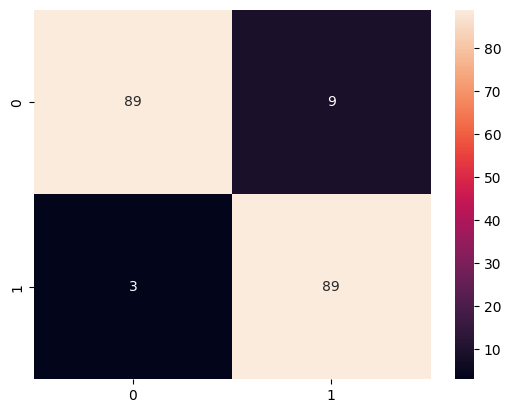

In [71]:
evaluate_model(svm,y_pred_svm)